In [1]:
import pandas as pd
data = pd.read_csv("~/code/aplabey/2nd_hand_fashion_valuation/raw_data/vestiaire.csv")

In [2]:
print(data.head())

   product_id            product_type  \
0    43247626         Wool mini skirt   
1    43247441                  Jacket   
2    43246517               Wool coat   
3    43246507              Mini skirt   
4    43246417  Vegan leather trousers   

                                        product_name  \
0  Wool mini skirt Miu Miu Grey size S Internatio...   
1      Jacket Barbara Bui Navy size 42 FR in Cotton    
2  Wool coat Comme Des Garcons White size S Inter...   
3     Mini skirt MSGM Black size 38 IT in Polyester    
4  Vegan leather trousers LVIR Black size 36 FR i...   

                                 product_description  \
0  Miu Miu – Pleated mini skirt Size: 36 (S)  Wai...   
1  For selling nice women's suit Barbara Bui size...   
2  Magnificent boiled wool coat. I bought it in t...   
3  MSGM Skirt Black Printed Raw-Edge & Embroidere...   
4  LVIR black grained faux leather trousers size ...   

               product_keywords product_gender_target product_category  \
0    

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900514 non-null  int64  
 1   product_type                900514 non-null  object 
 2   product_name                900514 non-null  object 
 3   product_description         900507 non-null  object 
 4   product_keywords            899331 non-null  object 
 5   product_gender_target       900514 non-null  object 
 6   product_category            899331 non-null  object 
 7   product_season              900512 non-null  object 
 8   product_condition           900514 non-null  object 
 9   product_like_count          900514 non-null  float64
 10  sold                        900514 non-null  bool   
 11  reserved                    900514 non-null  bool   
 12  available                   900514 non-null  bool   
 13  in_stock      

In [4]:
data.columns

Index(['product_id', 'product_type', 'product_name', 'product_description',
       'product_keywords', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'product_like_count', 'sold',
       'reserved', 'available', 'in_stock', 'should_be_gone', 'brand_id',
       'brand_name', 'brand_url', 'product_material', 'product_color',
       'price_usd', 'seller_price', 'seller_earning', 'seller_badge',
       'has_cross_border_fees', 'buyers_fees', 'warehouse_name', 'seller_id',
       'seller_username', 'usually_ships_within', 'seller_country',
       'seller_products_sold', 'seller_num_products_listed',
       'seller_community_rank', 'seller_num_followers', 'seller_pass_rate'],
      dtype='object')

In [5]:
data["has_cross_border_fees"].head()

0     NaN
1    True
2    True
3    True
4    True
Name: has_cross_border_fees, dtype: object

In [6]:
data.duplicated().sum() 

np.int64(0)

In [7]:
# Counting the number of NaN for each column
data.isnull().sum().sort_values(ascending=False)

usually_ships_within          154791
buyers_fees                    13736
has_cross_border_fees          13736
product_keywords                1183
product_category                1183
seller_username                   39
product_description                7
product_material                   4
product_season                     2
product_color                      1
product_id                         0
product_type                       0
product_name                       0
sold                               0
available                          0
in_stock                           0
reserved                           0
product_like_count                 0
product_condition                  0
product_gender_target              0
brand_name                         0
brand_url                          0
should_be_gone                     0
brand_id                           0
seller_badge                       0
seller_earning                     0
price_usd                          0
s

In [8]:
# Counting the percentage of NaN for each column
data.isnull().sum().sort_values(ascending=False) / len(data) #NaN percentage for each column

usually_ships_within          0.171892
buyers_fees                   0.015254
has_cross_border_fees         0.015254
product_keywords              0.001314
product_category              0.001314
seller_username               0.000043
product_description           0.000008
product_material              0.000004
product_season                0.000002
product_color                 0.000001
product_id                    0.000000
product_type                  0.000000
product_name                  0.000000
sold                          0.000000
available                     0.000000
in_stock                      0.000000
reserved                      0.000000
product_like_count            0.000000
product_condition             0.000000
product_gender_target         0.000000
brand_name                    0.000000
brand_url                     0.000000
should_be_gone                0.000000
brand_id                      0.000000
seller_badge                  0.000000
seller_earning           

In [9]:
grouped_by_brand = data.groupby('brand_name')

In [10]:
brand_counts = grouped_by_brand.size().sort_values(ascending=False)
brand_counts

brand_name
Gucci               41009
Burberry            24018
Dolce & Gabbana     22024
Prada               20972
Hermès              18711
                    ...  
08sircus                1
sister + seekers        1
simple retro            1
one grey day            1
noir/noir               1
Length: 8884, dtype: int64

## discuss about threshold (useful? size?)

In [11]:
threshold = 11
brands_with_few_counts = brand_counts[brand_counts < threshold]
brands_with_few_counts

brand_name
ISABELLE BLANCHE    10
#FR2                10
mbyM                10
Coocoomos           10
Mauritius           10
                    ..
08sircus             1
sister + seekers     1
simple retro         1
one grey day         1
noir/noir            1
Length: 5442, dtype: int64

In [12]:
brand_mapping = {brand: brand if count >= threshold else 'Others'
                 for brand, count in brand_counts.items()}

In [13]:
data['brand_name'] = data['brand_name'].map(brand_mapping)

In [14]:
brand_counts = data['brand_name'].value_counts()
brand_counts.sort_values(ascending=False)

brand_name
Gucci                41009
Burberry             24018
Dolce & Gabbana      22024
Prada                20972
Others               18777
                     ...  
PATAUGAS                11
Revue Thommen           11
Hosio                   11
Patrizia Bonfanti       11
L\'Arianna              11
Name: count, Length: 3443, dtype: int64

In [15]:
brand_price_mean = grouped_by_brand['price_usd'].mean().sort_values(ascending=False)
brand_price_mean

brand_name
Richard Mille              83408.116667
A. Lange & Sohne           50014.530000
Patek Philippe             34832.169735
Graff                      34727.760000
Audemars Piguet            22151.781268
                               ...     
Leather Satchel Company       19.800000
Silent Theory                 19.430000
Nude Lucy                     19.430000
Lahana swim                   19.430000
Jewelry For Less              14.300000
Name: price_usd, Length: 8884, dtype: float64

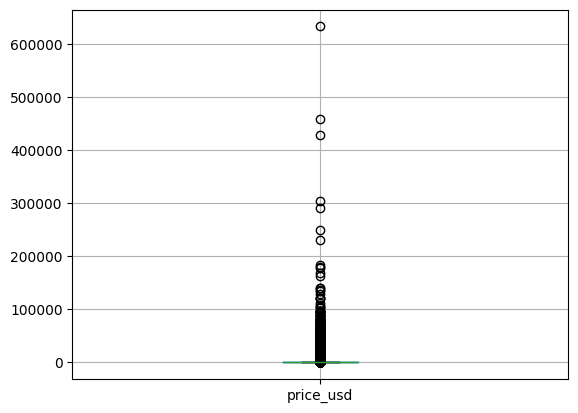

In [16]:
data[["price_usd"]].boxplot();

In [17]:
top_20_brands = data['brand_name'].value_counts().head(20).index
filtered_data = data[data['brand_name'].isin(top_20_brands)]
# Filter the DataFrame to include only the top 20 brands

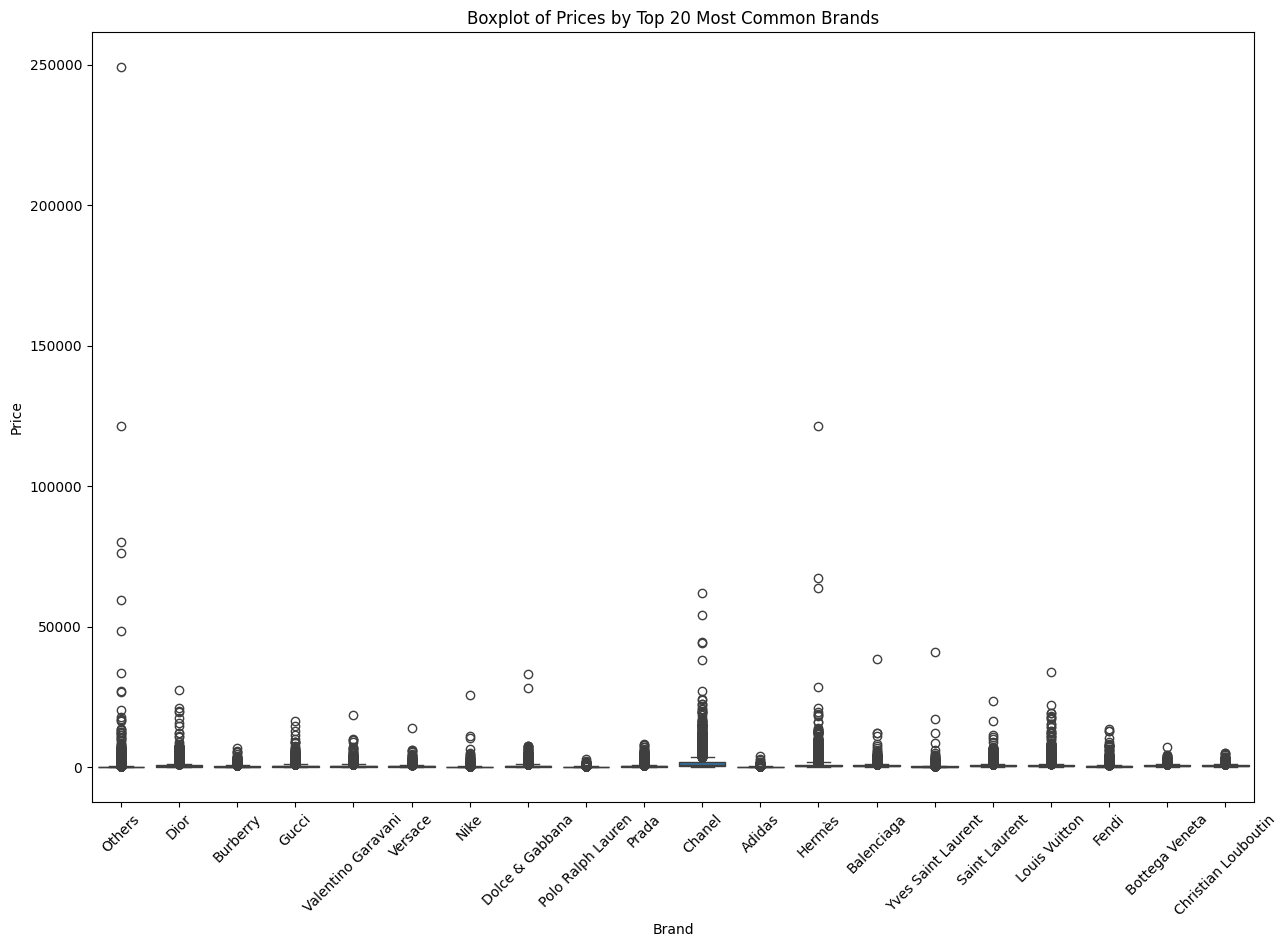

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.boxplot(x='brand_name', y='price_usd', data=filtered_data)
plt.xticks(rotation=45)
plt.title('Boxplot of Prices by Top 20 Most Common Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show();

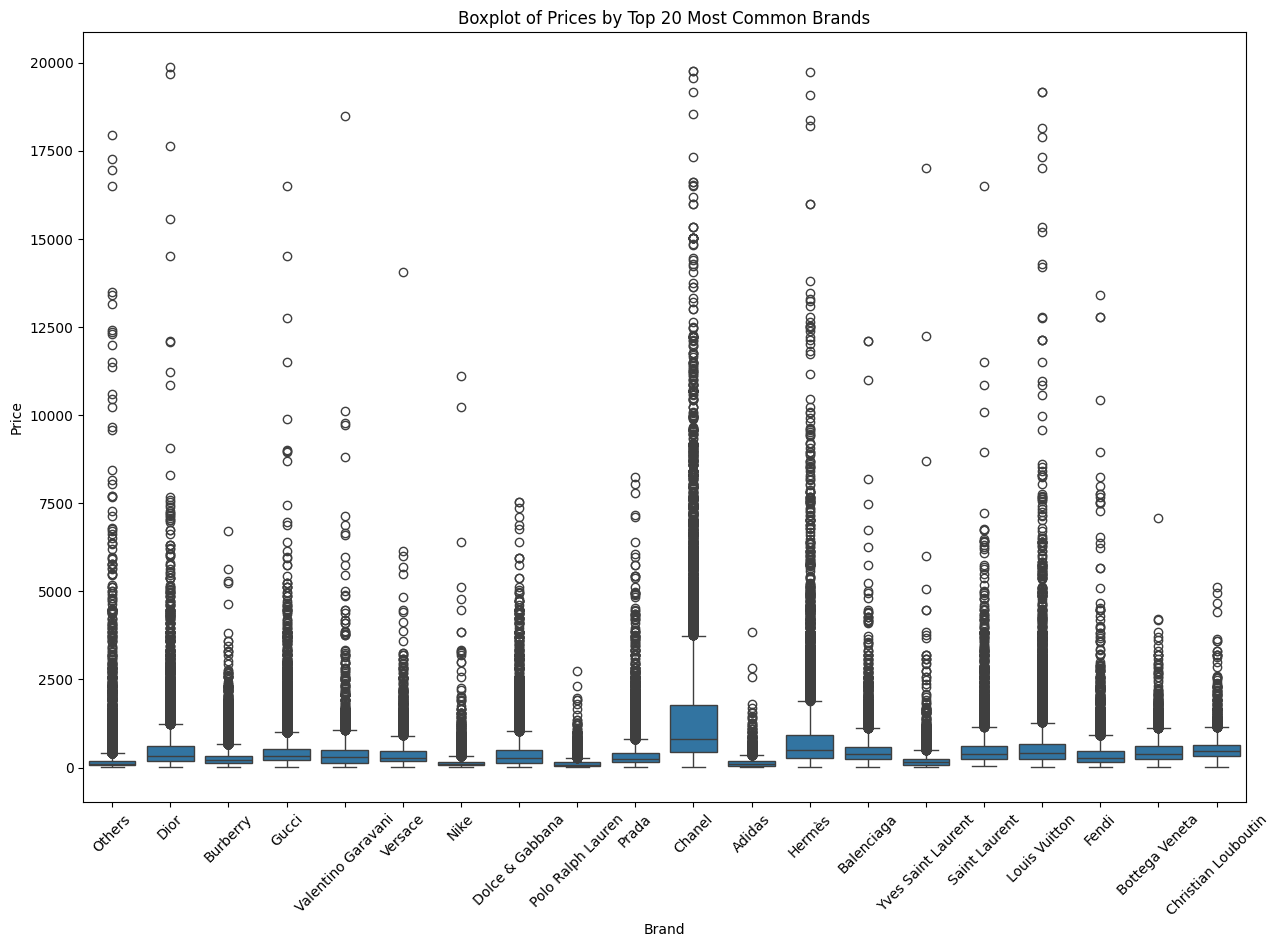

In [19]:
# Save the indexes corresponding to rows 
# without very high values (price < 200.000)
boolean_mask = (filtered_data['price_usd']<20000) 

# Apply the boolean filtering
filtered_data_boolean = filtered_data[boolean_mask].reset_index(drop=True)

# Visualize the boxplot again
plt.figure(figsize=(15, 10))
sns.boxplot(x='brand_name', y='price_usd', data=filtered_data_boolean)
plt.xticks(rotation=45)
plt.title('Boxplot of Prices by Top 20 Most Common Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show();

## Dropping Data

In [21]:
from sklearn.impute import SimpleImputer

# Step 1: Calculate the overall most frequent value
overall_most_frequent_value = data['usually_ships_within'].mode()[0]

# Step 2: Define the imputation function
def impute_most_frequent(group):
    # Check if all values in the group are missing
    if group['usually_ships_within'].isnull().all():
        # Impute with the overall most frequent value
        group['usually_ships_within'] = overall_most_frequent_value
    else:
        imputer = SimpleImputer(strategy="most_frequent")
        # Reshape to 2D array because SimpleImputer expects it
        group_reshaped = group[['usually_ships_within']].values.reshape(-1, 1)
        imputed = imputer.fit_transform(group_reshaped)
        group['usually_ships_within'] = imputed.ravel()
    return group

# Step 3: Group by 'brand_name' and apply the imputation function
data = data.groupby('brand_name').apply(impute_most_frequent).reset_index(drop=True)



/tmp/ipykernel_91703/859509969.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('brand_name').apply(impute_most_frequent).reset_index(drop=True)


In [24]:
# Counting the percentage of NaN for each column
data.isnull().sum().sort_values(ascending=False)

product_category              1183
product_keywords              1183
seller_username                 39
product_description              7
product_material                 4
product_season                   2
product_color                    1
product_id                       0
product_type                     0
product_gender_target            0
sold                             0
reserved                         0
available                        0
in_stock                         0
should_be_gone                   0
product_name                     0
product_condition                0
product_like_count               0
brand_url                        0
brand_name                       0
brand_id                         0
price_usd                        0
seller_earning                   0
seller_badge                     0
warehouse_name                   0
seller_price                     0
seller_id                        0
usually_ships_within             0
seller_country      

In [25]:
data.drop(['buyers_fees', 'has_cross_border_fees'], axis=1, inplace=True)

KeyError: "['buyers_fees', 'has_cross_border_fees'] not found in axis"

In [26]:
data.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women,Women Clothing,All seasons,Very good condition,0.0,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women,Women Clothing,All seasons,Very good condition,0.0,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Fair condition,0.0,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",1.0,...,Tourcoing,143269,stella143269,1-2 days,France,17.0,38.0,162473.0,45.0,76.0


In [27]:
data_cleaned = data.dropna()
data_cleaned.isnull().sum().sort_values(ascending=False)

product_id                    0
product_type                  0
product_name                  0
product_description           0
product_keywords              0
product_gender_target         0
product_category              0
product_season                0
product_condition             0
product_like_count            0
sold                          0
reserved                      0
available                     0
in_stock                      0
should_be_gone                0
brand_id                      0
brand_name                    0
brand_url                     0
product_material              0
product_color                 0
price_usd                     0
seller_price                  0
seller_earning                0
seller_badge                  0
warehouse_name                0
seller_id                     0
seller_username               0
usually_ships_within          0
seller_country                0
seller_products_sold          0
seller_num_products_listed    0
seller_c

In [ ]:
data_cleaned.info()

## Preprocessing

### Product_like_count
#### As it is very skewed I chose Robust Scaler

In [ ]:
likes_hist = sns.histplot(data_cleaned, x='product_like_count', hue="brand_name",bins=200,kde = True);
plt.show(likes_hist)

#### Feature Transformation/Engineering

If your feature is extremely skewed  
→
  consider Feature Engineering first (e.g. log(feature))
shell we do this?

In [ ]:
sns.boxplot(data=data_cleaned, x='product_like_count');
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler

# Step 0 - Instantiate Robust Scaler

rb_scaler = RobustScaler() 

# Step 1 - Fit the scaler to the `GrLiveArea`
# to "learn" the median value and the IQR

rb_scaler.fit(data_cleaned[['product_like_count']]) 

# Step 2 - Scale / Transform
# to apply the transformation (value - median) / IQR for every house

data_cleaned['product_like_count'] = rb_scaler.transform(data_cleaned[['product_like_count']]) 

data_cleaned.head()

### Seller_products_sold

In [ ]:
products_sold_hist = sns.histplot(data_cleaned['seller_products_sold'], bins=200,kde = True);
plt.show(products_sold_hist)

In [ ]:
# Step 0 - Instantiate Robust Scaler

rb_scaler = RobustScaler() 

# Step 1 - Fit the scaler to the `GrLiveArea`
# to "learn" the median value and the IQR

rb_scaler.fit(data_cleaned[['seller_products_sold']]) 

# Step 2 - Scale / Transform
# to apply the transformation (value - median) / IQR for every house

data_cleaned['seller_products_sold'] = rb_scaler.transform(data_cleaned[['seller_products_sold']]) 

data_cleaned.head()

### Seller_num_products_listed 

In [ ]:
products_listed_hist = sns.histplot(data_cleaned['seller_num_products_listed'], bins=200,kde = True);
plt.show(products__hist)

In [ ]:
# Step 0 - Instantiate Robust Scaler

rb_scaler = RobustScaler() 

# Step 1 - Fit the scaler to the `GrLiveArea`
# to "learn" the median value and the IQR

rb_scaler.fit(data_cleaned[['seller_num_products_listed']]) 

# Step 2 - Scale / Transform
# to apply the transformation (value - median) / IQR for every house

data_cleaned['seller_num_products_listed'] = rb_scaler.transform(data_cleaned[['seller_num_products_listed']]) 

data_cleaned.head()